In [1]:
import matplotlib.image as mpimg
import sys 
import os
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath("/Users/hanliu/Documents/Cryohub/cryoem-viztools/src/cryoem-viz/"))
import mrc2png
import star2df

In [2]:
IMGSIZE = 900
mrc2png.save_image("testing.mrc", "/Users/hanliu/Documents/Cryohub/", IMGSIZE)

In [3]:
star_data = star2df.star2df("./testing.star")["data_"][0]
CoordX = np.array(star_data["_rlnCoordinateX"].tolist())
CoordY = np.array(star_data["_rlnCoordinateY"].tolist())
star_data.head(2)

,_rlnCoordinateX,_rlnCoordinateY,_rlnClassNumber,_rlnAnglePsi,_rlnAutopickFigureOfMerit
0,207.5,7539.0,-999,-999.0,-999.0
1,395.0,7498.0,-999,-999.0,-999.0


In [4]:
# fig, ax = plt.subplots(figsize=(10,10))
# img = mpimg.imread("./testing.png")
# ax.imshow(img, cmap="gray")

# for i, (x, y) in enumerate(zip(rescaled_X, rescaled_Y)):
#     circle = plt.Circle((x, y), 3, color='r', fill=False)
#     ax.add_patch(circle)
# plt.show()

In [5]:
import pandas as pd
rescaled_X = np.interp(CoordX, (CoordX.min(), CoordX.max()), (0, IMGSIZE-50))
rescaled_Y = np.interp(CoordY, (CoordY.min(), CoordY.max()), (0, IMGSIZE))

df = pd.DataFrame()
df["rescaled_X"] =rescaled_X
df["rescaled_Y"] =rescaled_Y
df["size"] = [0.00001]*len(rescaled_X)
df["threshold"] = [str(len(str(v))) for v in rescaled_X]
df["color"] = df["threshold"]
grouped_dfs = dict(tuple(df.groupby("threshold")))
df.head()

,rescaled_X,rescaled_Y,size,threshold,color
0,9.268190,900.000000,0.00001,17,17
1,31.547494,895.034984,0.00001,18,18
2,77.353743,899.394510,0.00001,17,17
3,139.082267,889.161733,0.00001,17,17
4,161.123925,891.159849,0.00001,18,18



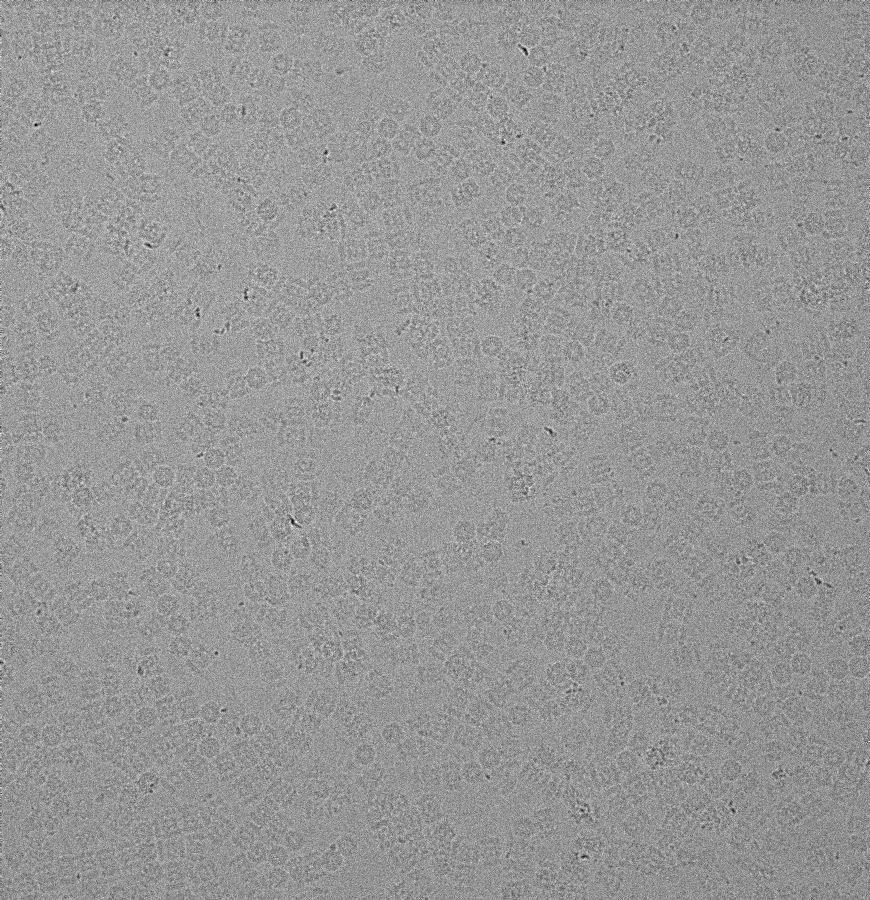

In [13]:
import plotly.express as px
from skimage import io
from plotly.offline import plot, iplot, init_notebook_mode

img = io.imread("./testing.png")
fig = px.imshow(img, binary_string=True, binary_format="png")

colors = ["red"]

thresholds = list(set(df.threshold.tolist()))
for threshold in thresholds:
    trace = px.scatter(
        grouped_dfs[threshold],
        x="rescaled_X",
        y="rescaled_Y",
        color = 'color',
        color_discrete_sequence = colors,
        width=IMGSIZE, 
        height=IMGSIZE,
    ).data[0]
    
    fig.add_trace(trace)
    
    
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=[{"visible": [True] + [False]* (len(fig.data)-1)},
              {"title": "Slider switched to threshold: " + fig.data[i].name}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Threshold: "},
#     pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    xaxis=dict(showgrid=False), 
    yaxis=dict(showgrid=False)
)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.data[0].visible = True
fig.show()

In [7]:
fig.write_html("./testing.html")

In [11]:
fig.data[1].name

'17'